In [1]:
print("Hello World")

Hello World


<class 'numpy.ndarray'>


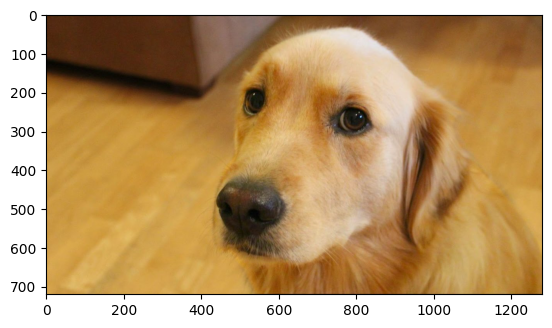

In [1]:
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
import torch
train_transforms = transforms.Compose([
    # 旋转角度为10度
    transforms.RandomRotation(10),
    # 根据提供的最小/最大缩放比例随机缩放图像大小
    transforms.Resize((224, 224)),
    transforms.RandomResizedCrop(224),
    # 随机水平翻转图像
    transforms.RandomHorizontalFlip(),
    # 随机垂直翻转图像
    transforms.RandomVerticalFlip(),
    # 填充图像边界,新边界为图像大小的4%
    transforms.Pad(4),
    # 在给定范围内随机调整图像的亮度,对比度和饱和度
    transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5),
    transforms.ToTensor(),
    # 归一化到[0,1]之间
    # transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
    transforms.Resize((256, 256)),
    transforms.CenterCrop((224, 224)),
])
test = Image.open("bobby.jpg")

# torch.ones(1).numpy()
r = (train_transforms(test).permute(1,2,0).numpy())
print(type(r))
plt.imshow(r)
plt.imshow(test)
# test

In [1]:
import timm
for i in timm.list_models("*vit*", pretrained=True):
    print(i)

convit_base
convit_small
convit_tiny
levit_128
levit_128s
levit_192
levit_256
levit_384
vit_base_patch16_224
vit_base_patch16_224_in21k
vit_base_patch16_224_miil
vit_base_patch16_224_miil_in21k
vit_base_patch16_384
vit_base_patch32_224
vit_base_patch32_224_in21k
vit_base_patch32_384
vit_base_r50_s16_224_in21k
vit_base_r50_s16_384
vit_huge_patch14_224_in21k
vit_large_patch16_224
vit_large_patch16_224_in21k
vit_large_patch16_384
vit_large_patch32_224_in21k
vit_large_patch32_384
vit_large_r50_s32_224
vit_large_r50_s32_224_in21k
vit_large_r50_s32_384
vit_small_patch16_224
vit_small_patch16_224_in21k
vit_small_patch16_384
vit_small_patch32_224
vit_small_patch32_224_in21k
vit_small_patch32_384
vit_small_r26_s32_224
vit_small_r26_s32_224_in21k
vit_small_r26_s32_384
vit_tiny_patch16_224
vit_tiny_patch16_224_in21k
vit_tiny_patch16_384
vit_tiny_r_s16_p8_224
vit_tiny_r_s16_p8_224_in21k
vit_tiny_r_s16_p8_384


In [5]:
tp = Image.open("train/aquatic_mammals_beaver/0.jpg")
transform = transforms.Compose([
    transforms.Resize(size=32),        # 重置大小
    transforms.ColorJitter(0.4, 0.4, 0.4), # 颜色抖动
    transforms.GaussianBlur(5, 9),     # 高斯模糊
    transforms.RandomHorizontalFlip(p=0.5), # 水平翻转
    transforms.RandomVerticalFlip(p=0.5),   # 垂直翻转
    transforms.RandomRotation((-20, 20)),   # 随机旋转
    transforms.ToTensor(),
])
tp1 = transform(tp)
tp.size


(32, 32)

In [26]:
model = timm.create_model("vit_small_patch32_224", pretrained=True)
# model.input_shape((3, 224, 224))
toT = transforms.ToTensor()
res = model(toT(r).unsqueeze(0))

In [27]:
import json
with open("imagenet_class_index.json", "r") as f:
    label = json.load(f)

In [28]:
label[str(int(res.argmax()))]

['n02099601', 'golden_retriever']

TypeError: Invalid shape (3, 32, 32) for image data

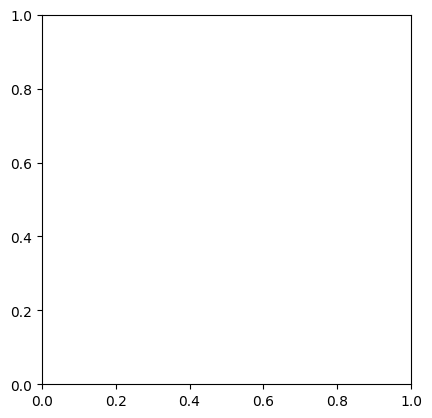

In [4]:
import matplotlib.pyplot as plt
plt.imshow(tp1.numpy())

In [32]:
et = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.CenterCrop((224, 224)),
    transforms.ToTensor()
])
res2 = model(et(test).unsqueeze(0))
label[str(int(res2.argmax()))]

['n02099601', 'golden_retriever']

In [3]:
import timm
mol = timm.create_model('vit_base_patch16_224', pretrained=True)
mol.eval()

VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    (norm): Identity()
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (blocks): Sequential(
    (0): Block(
      (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=768, out_features=2304, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=768, out_features=768, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (drop_path): Identity()
      (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (act): GELU()
        (fc2): Linear(in_features=3072, out_features=768, bias=True)
        (drop): Dropout(p=0.0, inplace=False)
      )
    )
    (1): Block(
      (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (attn